# Exercise 15: Extracting the cluster labels

In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the `fcluster()` function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

**Step 1:** Load the dataset: _(written for you)_

In [1]:
import pandas as pd

seeds_df = pd.read_csv('../datasets/seeds-less-rows.csv')

# remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# extract the measurements as a NumPy array
samples = seeds_df.values

In [3]:
seeds_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219
5,13.02,13.76,0.8641,5.395,3.026,3.373,4.825
6,15.49,14.94,0.8724,5.757,3.371,3.412,5.228
7,16.20,15.27,0.8734,5.826,3.464,2.823,5.527
8,13.50,13.85,0.8852,5.351,3.158,2.249,5.176
9,15.36,14.76,0.8861,5.701,3.393,1.367,5.132


**Step 2:** Run the hierarchical clustering of the grain samples that you worked out earlier _(filled in here for you)._

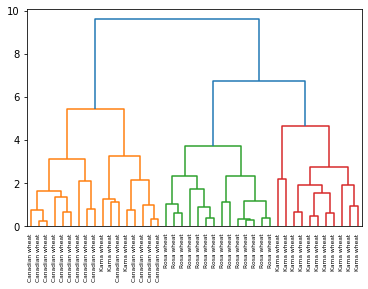

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(samples, method='complete')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

**Step 3:** Import `fcluster` from `scipy.cluster.hierarchy`.

In [5]:
from scipy.cluster.hierarchy import fcluster

**Step 4:** Obtain a flat clustering by using the `fcluster()` function on `mergings`. Specify a maximum height of `6` and the keyword argument `criterion='distance'`.  Assign the result to `labels`.

In [8]:
labels = fcluster(mergings,t=6, criterion='distance')

**Step 5:** Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values.

In [10]:
df = pd.DataFrame({'labels':labels, 'variaties':varieties})
df

,labels,variaties
0,3,Kama wheat
1,3,Kama wheat
2,3,Kama wheat
3,3,Kama wheat
4,3,Kama wheat
5,1,Kama wheat
6,3,Kama wheat
7,3,Kama wheat
8,1,Kama wheat
9,3,Kama wheat


import pandas as pd import seaborn as sns.
pd. crosstab(df. make, df. body_style)
df. groupby(['make', 'body_style'])['body_style']. count(). unstack(). fillna(0)
df. pivot_table(index='make', columns='body_style', aggfunc={'body_style':len}, fill_value=0)

**Step 6:** Create a cross-tabulation `ct` between `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster label.

In [12]:
ct= pd.crosstab(df['labels'], df['variaties'])


variaties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,14,3,0
2,0,0,14
3,0,11,0


**Step 7:** Display `ct` to see how your cluster labels correspond to the wheat varieties.

variaties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,14,3,0
2,0,0,14
3,0,11,0


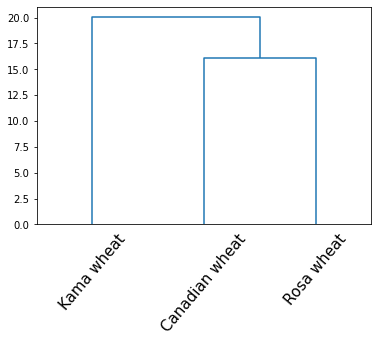

In [17]:
ct_ = linkage(ct.values, method='complete')

dendrogram(ct_,
           labels=ct.columns,
           leaf_rotation=50,
           leaf_font_size=15,
)
plt.show()